In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

path = "/content/drive/Shareddrives/DATA 245 - ML/cleaned_SF_crime_report.csv"
df = pd.read_csv(path)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar
from sklearn.metrics import log_loss

In [ ]:
# set the plot size using 'rcParams'
# once the plot size is set using 'rcParams', it sets the size of all the forthcoming plots in the file
# pass width and height in inches to 'figure.figsize' 
plt.rcParams['figure.figsize'] = [15,8]

In [ ]:
df.head()

,Incident_Date,Incident_Time,Incident_Year,Incident_Day_of_Week,Report_Datetime,Row_ID,Incident_ID,Incident_Number,Report_Type_Code,Report_Type_Description,...,Incident_Category,Incident_Subcategory,Incident_Description,Resolution,CNN,Police_District,Analysis_Neighborhood,Supervisor_District,Latitude,Longitude
0,2019/03/05,21:00,2019,Tuesday,2019/03/07 12:54:00 PM,77808706372,778087,196048512,II,Coplogic Initial,...,Larceny Theft,Larceny Theft - Other,"Theft, Other Property, $50-$200",Open or Active,30044000.0,Tenderloin,Tenderloin,6.0,37.779992,-122.413487
1,2018/12/22,12:00,2018,Saturday,2018/12/26 02:29:00 PM,75246907023,752469,180971777,VI,Vehicle Initial,...,Motor Vehicle Theft,Motor Vehicle Theft,"Vehicle, Stolen, Motorcycle",Open or Active,25931000.0,Northern,Hayes Valley,5.0,37.775787,-122.427819
2,2018/08/24,17:30,2018,Friday,2018/08/24 07:35:00 PM,70675306243,706753,180639339,II,Initial,...,Larceny Theft,Larceny - From Vehicle,"Theft, From Locked Vehicle, $200-$950",Open or Active,21610000.0,Ingleside,Excelsior,9.0,37.723944,-122.422830
3,2018/10/20,15:10,2018,Saturday,2018/10/20 03:10:00 PM,72826462071,728264,180624631,IS,Initial Supplement,...,Warrant,Other,Probation Search,Cite or Arrest Adult,23914000.0,Southern,South of Market,6.0,37.775161,-122.403636
4,2019/06/05,00:36,2019,Wednesday,2019/06/05 12:37:00 AM,80823030140,808230,190403077,II,Initial,...,Other Offenses,Other,"Air Gun, Possession",Cite or Arrest Adult,30035000.0,Central,North Beach,3.0,37.802755,-122.413623


In [ ]:
df.shape 

(554712, 22)

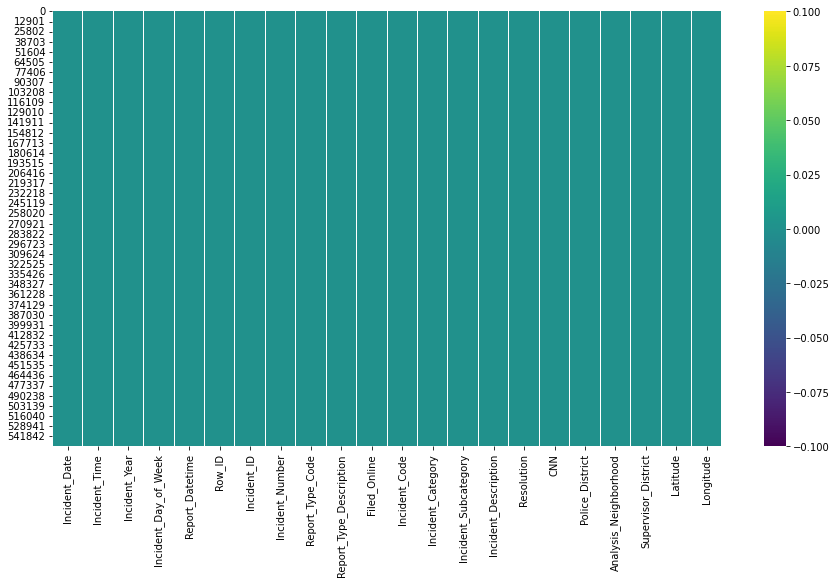

In [ ]:
#Finding the Missing Values
sns.heatmap(df.isnull(),cmap = 'viridis')

In [ ]:

df.isnull().sum()

Incident_Date              0
Incident_Time              0
Incident_Year              0
Incident_Day_of_Week       0
Report_Datetime            0
Row_ID                     0
Incident_ID                0
Incident_Number            0
Report_Type_Code           0
Report_Type_Description    0
Filed_Online               0
Incident_Code              0
Incident_Category          0
Incident_Subcategory       0
Incident_Description       0
Resolution                 0
CNN                        0
Police_District            0
Analysis_Neighborhood      0
Supervisor_District        0
Latitude                   0
Longitude                  0
dtype: int64

In [ ]:
# sort the variables on the basis of total null values in the variable
# 'isnull().sum()' returns the number of missing values in each variable
# 'ascending = False' sorts values in the descending order
# the variable with highest number of missing values will appear first
Total = df.isnull().sum().sort_values(ascending = False)          

# calculate the percentage of missing values
# 'ascending = False' sorts values in the descending order
# the variable with highest percentage of missing values will appear first
Percent = (df.isnull().sum()*100/df.isnull().count()).sort_values(ascending = False)   

# concat the 'Total' and 'Percent' columns using 'concat' function
# 'keys' is the list of column names
# 'axis = 1' concats along the columns
missing_data = pd.concat([Total, Percent], axis = 1, keys = ['Total', 'Percentage of Missing Values'])    
missing_data

,Total,Percentage of Missing Values
Incident_Date,0,0.0
Incident_Time,0,0.0
Latitude,0,0.0
Supervisor_District,0,0.0
Analysis_Neighborhood,0,0.0
Police_District,0,0.0
CNN,0,0.0
Resolution,0,0.0
Incident_Description,0,0.0
Incident_Subcategory,0,0.0


In [ ]:
# use the corr() function to generate the correlation matrix of the numeric variables
corrmat = df.corr()

# print the correlation matrix
corrmat

,Incident_Year,Row_ID,Incident_ID,Incident_Number,Filed_Online,Incident_Code,CNN,Supervisor_District,Latitude,Longitude
Incident_Year,1.000000,0.965366,0.965366,0.945816,-0.038609,-0.023878,-0.006003,0.006209,-0.020119,-0.019864
Row_ID,0.965366,1.000000,1.000000,0.928391,-0.032634,-0.025319,-0.002790,0.003531,-0.019199,-0.021737
Incident_ID,0.965366,1.000000,1.000000,0.928391,-0.032633,-0.025320,-0.002790,0.003531,-0.019199,-0.021737
Incident_Number,0.945816,0.928391,0.928391,1.000000,0.117950,-0.060484,0.006024,-0.012673,-0.003507,-0.028963
Filed_Online,-0.038609,-0.032634,-0.032633,0.117950,1.000000,-0.202151,0.055657,-0.116576,0.110611,-0.052246
Incident_Code,-0.023878,-0.025319,-0.025320,-0.060484,-0.202151,1.000000,-0.032793,0.059376,-0.049021,0.015478
CNN,-0.006003,-0.002790,-0.002790,0.006024,0.055657,-0.032793,1.000000,-0.412918,0.374118,-0.201558
Supervisor_District,0.006209,0.003531,0.003531,-0.012673,-0.116576,0.059376,-0.412918,1.000000,-0.764195,0.318425
Latitude,-0.020119,-0.019199,-0.019199,-0.003507,0.110611,-0.049021,0.374118,-0.764195,1.000000,0.154794
Longitude,-0.019864,-0.021737,-0.021737,-0.028963,-0.052246,0.015478,-0.201558,0.318425,0.154794,1.000000


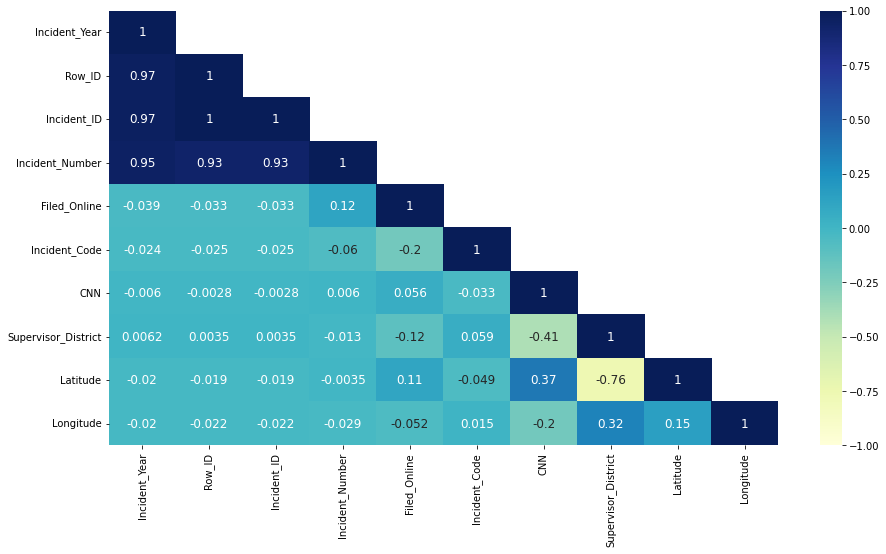

In [ ]:
# use 'mask' to plot a lower triangular correlation matrix 
# 'triu_indices_from' returns the indices for the upper-triangle of matrix
mask = np.zeros_like(corrmat)
mask[np.triu_indices_from(mask, k=1)] = True

# plot the heat map
# corr: give the correlation matrix
# cmap: color code used for plotting
# vmax: gives a maximum range of values for the chart
# vmin: gives a minimum range of values for the chart
# annot: prints the correlation values in the chart
# annot_kws: sets the font size of the annotation
# mask: mask the upper traingular matrix values
sns.heatmap(corrmat, cmap = 'YlGnBu', vmax = 1.0, vmin = -1.0, annot = True, annot_kws = {"size": 12}, mask = mask)

row ID and incident ID are both unique IDs, so we drop one of them

In [ ]:
df.drop(['Row_ID'], axis =1, inplace=True)
df.drop(['Incident_Number'], axis =1, inplace=True)

In [ ]:
df.dtypes

Incident_Date               object
Incident_Time               object
Incident_Year                int64
Incident_Day_of_Week        object
Report_Datetime             object
Incident_ID                  int64
Report_Type_Code            object
Report_Type_Description     object
Filed_Online                  bool
Incident_Code                int64
Incident_Category           object
Incident_Subcategory        object
Incident_Description        object
Resolution                  object
CNN                        float64
Police_District             object
Analysis_Neighborhood       object
Supervisor_District        float64
Latitude                   float64
Longitude                  float64
dtype: object

**Changing the column types**

In [ ]:
df['Report_Datetime'] = pd.to_datetime(df['Report_Datetime'])
df['Incident_Date'] = pd.to_datetime(df['Incident_Date'])

In [ ]:
df['Report_Type_Code'].unique()

array(['II', 'VI', 'IS', 'VS'], dtype=object)

In [ ]:
df['Incident_Category'].unique()

array(['Larceny Theft', 'Motor Vehicle Theft', 'Warrant',
       'Other Offenses', 'Other Miscellaneous', 'Burglary',
       'Offences Against The Family And Children', 'Robbery',
       'Lost Property', 'Fraud', 'Malicious Mischief', 'Assault',
       'Case Closure', 'Non-Criminal', 'Arson', 'Recovered Vehicle',
       'Traffic Violation Arrest', 'Drug Offense', 'Disorderly Conduct',
       'Sex Offense', 'Suspicious Occ', 'Missing Person',
       'Civil Sidewalks', 'Other', 'Miscellaneous Investigation',
       'Weapons Offense', 'Weapons Carrying Etc', 'Stolen Property',
       'Forgery And Counterfeiting', 'Vehicle Impounded', 'Prostitution',
       'Courtesy Report', 'Suspicious', 'Traffic Collision',
       'Drug Violation', 'Fire Report', 'Vandalism', 'Homicide',
       'Vehicle Misplaced', 'Human Trafficking (A), Commercial Sex Acts',
       'Embezzlement', 'Gambling', 'Liquor Laws', 'Motor Vehicle Theft?',
       'Rape', 'Suicide', 'Weapons Offence',
       'Human Trafficking,

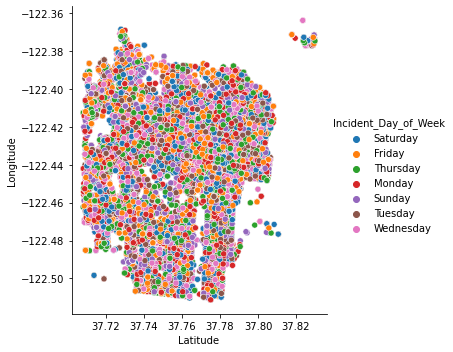

In [ ]:
sns.relplot(x='Latitude', y ='Longitude', hue='Incident_Day_of_Week', data=df[df['Incident_Year']==2018]) 
plt.rcParams['figure.figsize'] = [15,8]

In [ ]:
df[['Incident_Category', 'Incident_Day_of_Week']].value_counts().head(20)

Incident_Category    Incident_Day_of_Week
Larceny Theft        Friday                  25455
                     Saturday                24360
                     Wednesday               22915
                     Monday                  22659
                     Thursday                22349
                     Sunday                  22246
                     Tuesday                 21547
Other Miscellaneous  Wednesday                6558
                     Friday                   6126
                     Thursday                 6000
                     Monday                   5893
                     Tuesday                  5858
Malicious Mischief   Friday                   5785
Other Miscellaneous  Saturday                 5717
                     Sunday                   5698
Malicious Mischief   Saturday                 5656
Assault              Saturday                 5445
Malicious Mischief   Monday                   5418
                     Wednesday          

In [ ]:
category_freqency = pd.DataFrame(df['Incident_Category'].value_counts(normalize=True))
category_freqency.reset_index(inplace=True)
category_freqency.rename({'index': 'Incident_Category', 'Incident_Category': 'Frequency'}, axis='columns', inplace=True)
category_freqency['Cumulative_Freq'] = category_freqency['Frequency'].cumsum()
category_freqency

,Incident_Category,Frequency,Cumulative_Freq
0,Larceny Theft,0.291198,0.291198
1,Other Miscellaneous,0.075445,0.366643
2,Malicious Mischief,0.068320,0.434963
3,Assault,0.063325,0.498287
4,Non-Criminal,0.062903,0.561190
5,Burglary,0.059478,0.620668
6,Motor Vehicle Theft,0.051338,0.672006
7,Warrant,0.031732,0.703738
8,Fraud,0.031561,0.735299
9,Recovered Vehicle,0.029107,0.764406


In [ ]:
Top_class1 = list(category_freqency.loc[category_freqency['Frequency'] > 0.02, 'Incident_Category'])
Top_class1

['Larceny Theft',
 'Other Miscellaneous',
 'Malicious Mischief',
 'Assault',
 'Non-Criminal',
 'Burglary',
 'Motor Vehicle Theft',
 'Warrant',
 'Fraud',
 'Recovered Vehicle',
 'Lost Property',
 'Drug Offense',
 'Robbery',
 'Missing Person',
 'Suspicious Occ']

In [ ]:
Top_class = list(category_freqency.loc[category_freqency['Cumulative_Freq'] < 0.8, 'Incident_Category'])
Top_class

['Larceny Theft',
 'Other Miscellaneous',
 'Malicious Mischief',
 'Assault',
 'Non-Criminal',
 'Burglary',
 'Motor Vehicle Theft',
 'Warrant',
 'Fraud',
 'Recovered Vehicle',
 'Lost Property']

In [ ]:
reduced_cat = df.loc[df['Incident_Category'].isin(Top_class)]
reduced_cat

,Incident_Date,Incident_Time,Incident_Year,Incident_Day_of_Week,Report_Datetime,Incident_ID,Report_Type_Code,Report_Type_Description,Filed_Online,Incident_Code,Incident_Category,Incident_Subcategory,Incident_Description,Resolution,CNN,Police_District,Analysis_Neighborhood,Supervisor_District,Latitude,Longitude
0,2019-03-05,21:00,2019,Tuesday,2019-03-07 12:54:00,778087,II,Coplogic Initial,True,6372,Larceny Theft,Larceny Theft - Other,"Theft, Other Property, $50-$200",Open or Active,30044000.0,Tenderloin,Tenderloin,6.0,37.779992,-122.413487
1,2018-12-22,12:00,2018,Saturday,2018-12-26 14:29:00,752469,VI,Vehicle Initial,False,7023,Motor Vehicle Theft,Motor Vehicle Theft,"Vehicle, Stolen, Motorcycle",Open or Active,25931000.0,Northern,Hayes Valley,5.0,37.775787,-122.427819
2,2018-08-24,17:30,2018,Friday,2018-08-24 19:35:00,706753,II,Initial,False,6243,Larceny Theft,Larceny - From Vehicle,"Theft, From Locked Vehicle, $200-$950",Open or Active,21610000.0,Ingleside,Excelsior,9.0,37.723944,-122.422830
3,2018-10-20,15:10,2018,Saturday,2018-10-20 15:10:00,728264,IS,Initial Supplement,False,62071,Warrant,Other,Probation Search,Cite or Arrest Adult,23914000.0,Southern,South of Market,6.0,37.775161,-122.403636
5,2019-02-12,07:00,2019,Tuesday,2019-02-12 09:20:00,769624,II,Initial,False,6304,Larceny Theft,Larceny Theft - From Building,"Theft, From Building, >$950",Open or Active,24620000.0,Southern,Financial District/South Beach,6.0,37.787890,-122.401043
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
554704,2020-09-12,19:35,2020,Saturday,2020-09-12 19:35:00,960843,II,Initial,False,27068,Other Miscellaneous,Other,False Report of Emergency,Open or Active,27278000.0,Richmond,Inner Richmond,1.0,37.777136,-122.466154
554706,2020-07-16,16:00,2020,Thursday,2020-07-17 13:26:00,944589,II,Initial,False,6301,Larceny Theft,Larceny Theft - From Building,"Theft, From Building, <$50",Open or Active,34071000.0,Southern,Treasure Island,6.0,37.824119,-122.372658
554708,2020-08-01,17:34,2020,Saturday,2020-08-01 18:04:00,949118,II,Initial,False,6361,Larceny Theft,Larceny Theft - Shoplifting,"Theft, Shoplifting, <$50",Open or Active,27500000.0,Richmond,Outer Richmond,1.0,37.780476,-122.476169
554709,2020-06-01,01:55,2020,Monday,2020-06-01 01:55:00,931920,II,Initial,False,5061,Burglary,Burglary - Commercial,"Burglary, Warehouse, Forcible Entry",Open or Active,23610000.0,Bayview,Potrero Hill,10.0,37.754000,-122.389860


In [ ]:
df2=reduced_cat

Text(0.5, 1.0, 'The Most  Common Occuring Crimes in San Francisco')

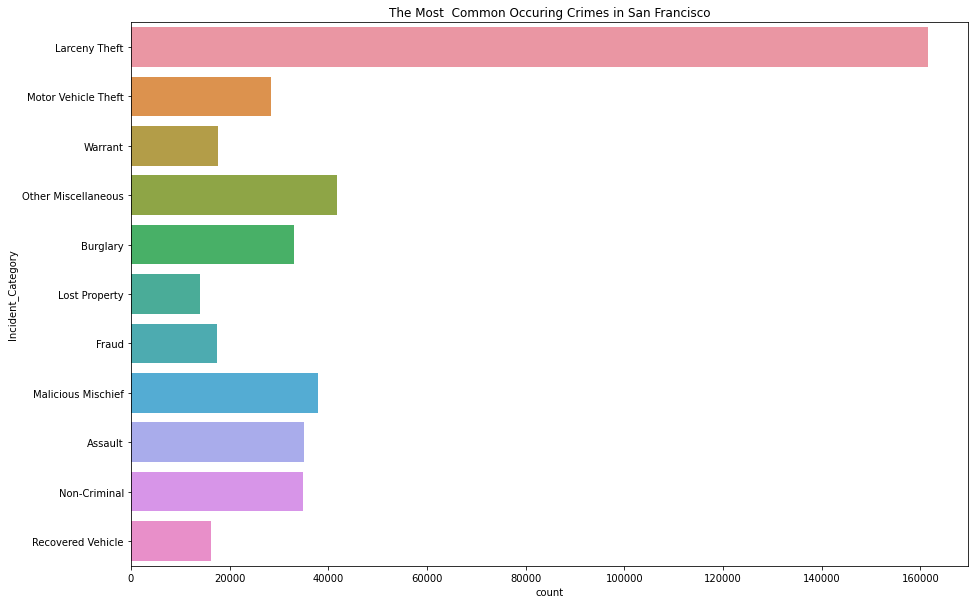

In [ ]:
fig, count = plt.subplots(figsize = (15,10))
count = sns.countplot(y = reduced_cat['Incident_Category'])
count.set_title('The Most  Common Occuring Crimes in San Francisco')  

##**Most Common Crimes in San Francisco** 


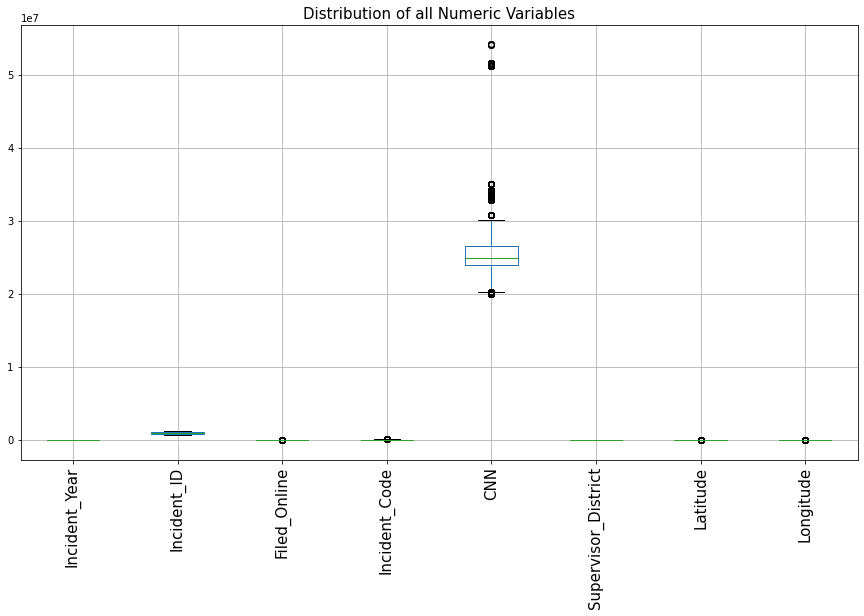

In [ ]:
# plot a boxplot to visualize the outliers in all the numeric variables
df2.boxplot()

# set plot label
# set text size using 'fontsize'
plt.title('Distribution of all Numeric Variables', fontsize = 15)

# xticks() returns the x-axis ticks
# 'rotation = vertical' rotates the x-axis labels vertically
plt.xticks(rotation = 'vertical', fontsize = 15)

# display the plot
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


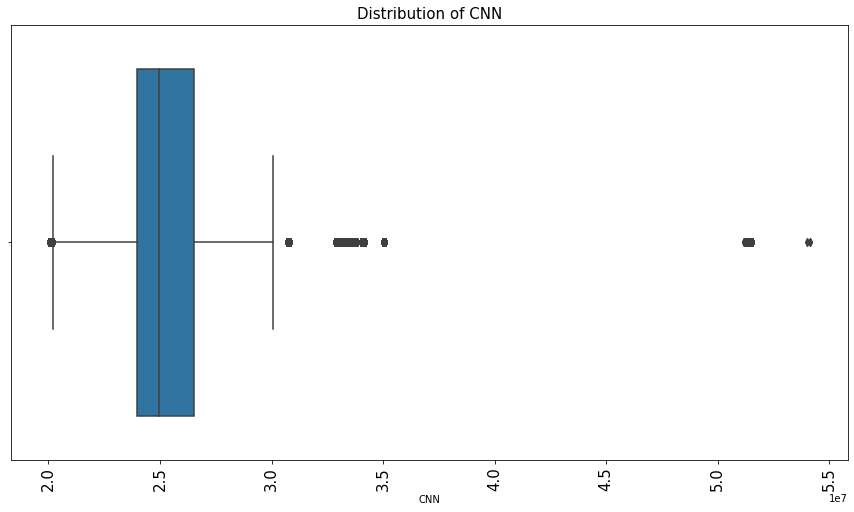

In [ ]:
sns.boxplot(df2['CNN'])

# set plot label
# set text size using 'fontsize'
plt.title('Distribution of CNN', fontsize = 15)

# xticks() returns the x-axis ticks
# 'rotation = vertical' rotates the x-axis labels vertically
plt.xticks(rotation = 'vertical', fontsize = 15)

# display the plot
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


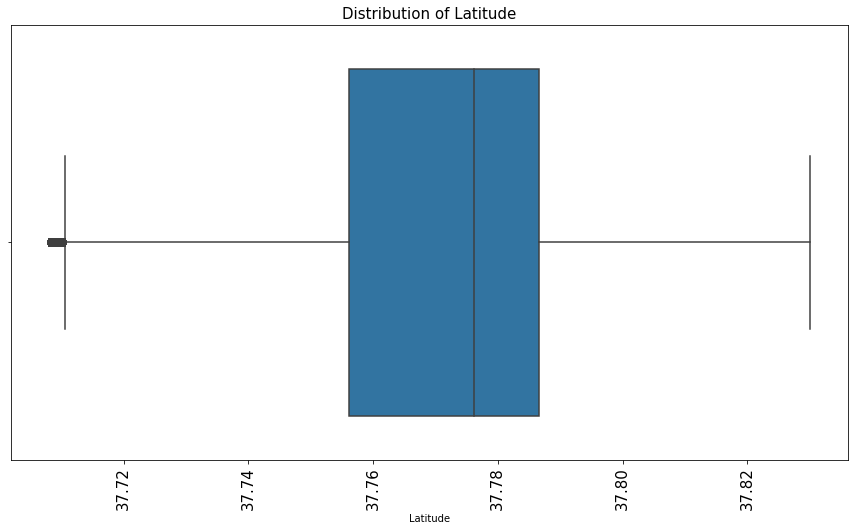

In [ ]:
sns.boxplot(df2['Latitude'])

# set plot label
# set text size using 'fontsize'
plt.title('Distribution of Latitude', fontsize = 15)

# xticks() returns the x-axis ticks
# 'rotation = vertical' rotates the x-axis labels vertically
plt.xticks(rotation = 'vertical', fontsize = 15)

# display the plot
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


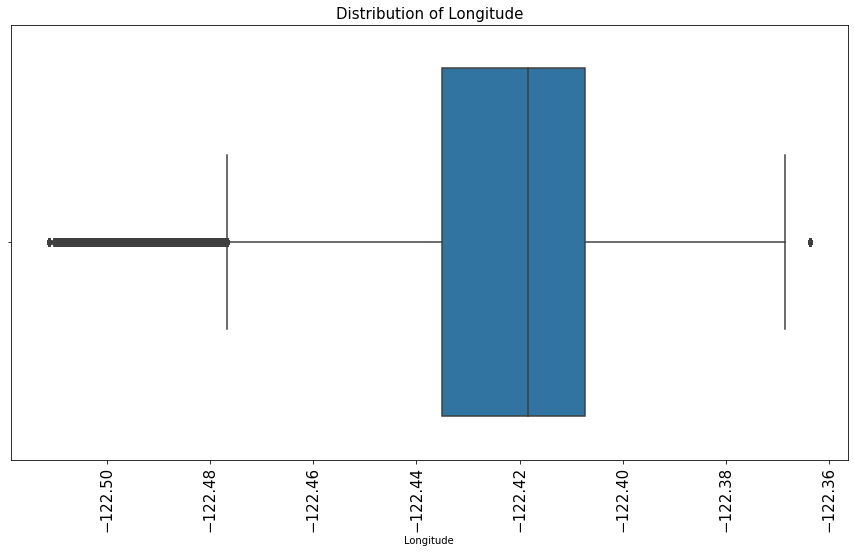

In [ ]:
sns.boxplot(df2['Longitude'])

# set plot label
# set text size using 'fontsize'
plt.title('Distribution of Longitude', fontsize = 15)

# xticks() returns the x-axis ticks
# 'rotation = vertical' rotates the x-axis labels vertically
plt.xticks(rotation = 'vertical', fontsize = 15)

# display the plot
plt.show()

## **LARCENY THEFT**

In [ ]:
Larceny_Theft = reduced_cat.loc[reduced_cat['Incident_Category'] == 'Larceny Theft']
Larceny_Theft

,Incident_Date,Incident_Time,Incident_Year,Incident_Day_of_Week,Report_Datetime,Incident_ID,Report_Type_Code,Report_Type_Description,Filed_Online,Incident_Code,Incident_Category,Incident_Subcategory,Incident_Description,Resolution,CNN,Police_District,Analysis_Neighborhood,Supervisor_District,Latitude,Longitude
0,2019-03-05,21:00,2019,Tuesday,2019-03-07 12:54:00,778087,II,Coplogic Initial,True,6372,Larceny Theft,Larceny Theft - Other,"Theft, Other Property, $50-$200",Open or Active,30044000.0,Tenderloin,Tenderloin,6.0,37.779992,-122.413487
2,2018-08-24,17:30,2018,Friday,2018-08-24 19:35:00,706753,II,Initial,False,6243,Larceny Theft,Larceny - From Vehicle,"Theft, From Locked Vehicle, $200-$950",Open or Active,21610000.0,Ingleside,Excelsior,9.0,37.723944,-122.422830
5,2019-02-12,07:00,2019,Tuesday,2019-02-12 09:20:00,769624,II,Initial,False,6304,Larceny Theft,Larceny Theft - From Building,"Theft, From Building, >$950",Open or Active,24620000.0,Southern,Financial District/South Beach,6.0,37.787890,-122.401043
17,2018-11-18,20:20,2018,Sunday,2018-11-18 21:10:00,738957,II,Initial,False,6244,Larceny Theft,Larceny - From Vehicle,"Theft, From Locked Vehicle, >$950",Open or Active,26834000.0,Richmond,Lone Mountain/USF,2.0,37.782488,-122.445821
18,2019-04-06,23:30,2019,Saturday,2019-04-07 13:55:00,789131,IS,Initial Supplement,False,6154,Larceny Theft,Larceny Theft - Other,"Theft, From Person, >$950 (other than Pickpocket)",Open or Active,24145000.0,Mission,Mission,9.0,37.760235,-122.419206
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
554697,2020-06-04,16:00,2020,Thursday,2020-06-05 11:37:00,933204,II,Coplogic Initial,True,6244,Larceny Theft,Larceny - From Vehicle,"Theft, From Locked Vehicle, >$950",Open or Active,27710000.0,Taraval,Sunset/Parkside,4.0,37.759265,-122.489722
554702,2020-07-30,02:14,2020,Thursday,2020-07-30 14:36:00,948446,II,Initial,False,6244,Larceny Theft,Larceny - From Vehicle,"Theft, From Locked Vehicle, >$950",Open or Active,24773000.0,Central,Chinatown,3.0,37.794860,-122.404876
554706,2020-07-16,16:00,2020,Thursday,2020-07-17 13:26:00,944589,II,Initial,False,6301,Larceny Theft,Larceny Theft - From Building,"Theft, From Building, <$50",Open or Active,34071000.0,Southern,Treasure Island,6.0,37.824119,-122.372658
554708,2020-08-01,17:34,2020,Saturday,2020-08-01 18:04:00,949118,II,Initial,False,6361,Larceny Theft,Larceny Theft - Shoplifting,"Theft, Shoplifting, <$50",Open or Active,27500000.0,Richmond,Outer Richmond,1.0,37.780476,-122.476169


In [ ]:
Larceny_Theft.value_counts()

Incident_Date  Incident_Time  Incident_Year  Incident_Day_of_Week  Report_Datetime      Incident_ID  Report_Type_Code  Report_Type_Description  Filed_Online  Incident_Code  Incident_Category  Incident_Subcategory    Incident_Description                                     Resolution      CNN         Police_District  Analysis_Neighborhood           Supervisor_District  Latitude   Longitude  
2018-01-01     00:00          2018           Monday                2018-01-01 11:52:00  619210       II                Coplogic Initial         True          6374           Larceny Theft      Larceny Theft - Other   Theft, Other Property, >$950                             Open or Active  24918000.0  Central          Financial District/South Beach  3.0                  37.788293  -122.408402    1
2020-08-29     10:56          2020           Saturday              2020-08-29 14:17:00  957377       II                Coplogic Initial         True          6244           Larceny Theft      Larceny - From 

In [ ]:
df2['Incident_Category'].value_counts()


Larceny Theft          161531
Other Miscellaneous     41850
Malicious Mischief      37898
Assault                 35127
Non-Criminal            34893
Burglary                32993
Motor Vehicle Theft     28478
Warrant                 17602
Fraud                   17507
Recovered Vehicle       16146
Lost Property           14087
Name: Incident_Category, dtype: int64

In [ ]:
Larceny_Theft['Incident_Description'].unique()


array(['Theft, Other Property, $50-$200',
       'Theft, From Locked Vehicle, $200-$950',
       'Theft, From Building, >$950', 'Theft, From Locked Vehicle, >$950',
       'Theft, From Person, >$950 (other than Pickpocket)',
       'Theft, From Building, <$50',
       'Theft, From Unlocked Vehicle, >$950',
       'Theft, Other Property, >$950',
       'Theft of Computers or Cell Phones', 'Theft, Shoplifting, <$50',
       'License Plate, Stolen', 'Theft, From Building, $50-$200',
       'Theft, Shoplifting, $50-$200', 'Theft, Pickpocket, $50-$200',
       'Theft, From Locked Vehicle, $50-$200',
       'Theft, Other Property, <$50', 'Theft from Merchant or Library',
       'Theft, Shoplifting, $200-$950',
       'Theft, From Locked Vehicle, <$50',
       'Theft, Other Property, $200-$950',
       'Theft, From Unlocked Vehicle, $200-$950',
       'Theft, Pickpocket, >$950', 'Theft of Animals (general)',
       'Theft of Checks or Credit Cards', 'Theft, Shoplifting, >$950',
       'Theft,

Text(0.5, 1.0, 'Larceny Theft Descriptions Count')

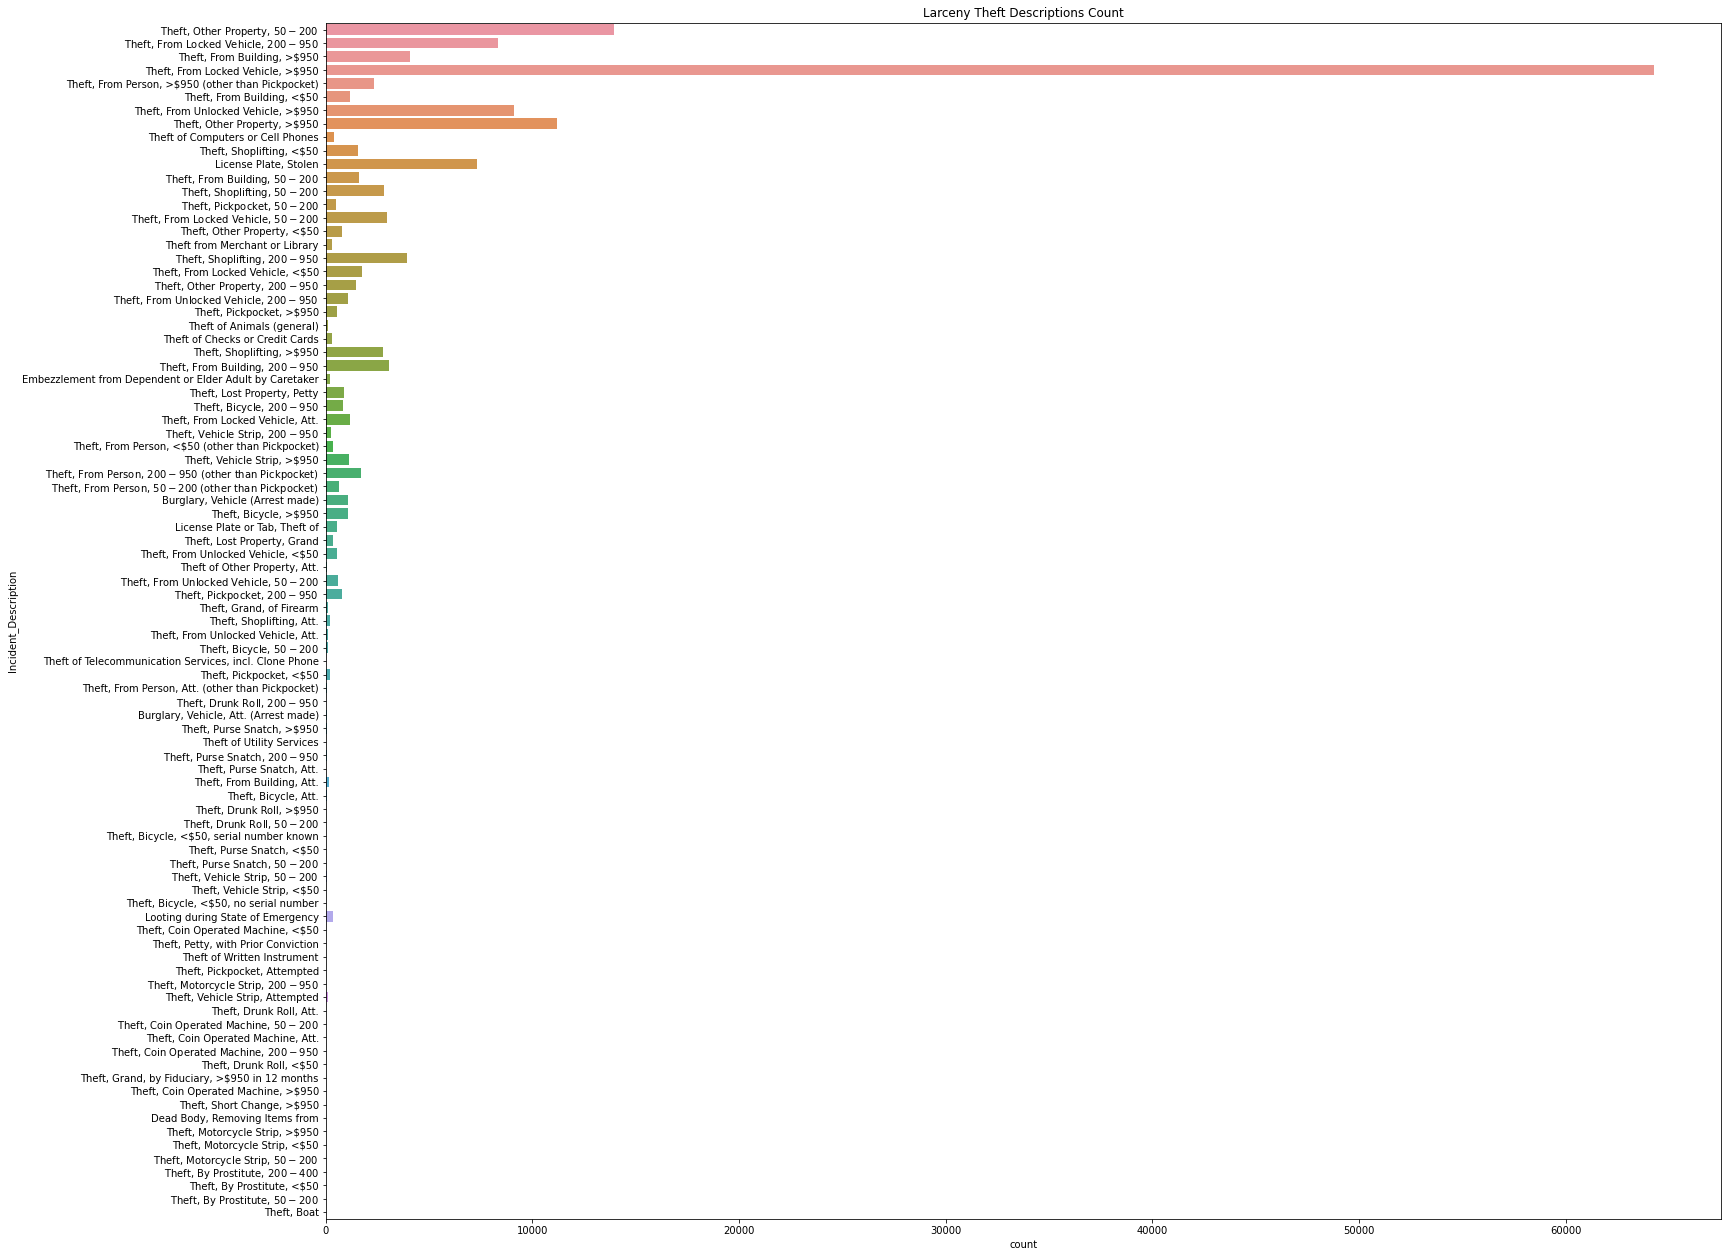

In [ ]:
fig, count = plt.subplots(figsize = (25,22))
count = sns.countplot(y = Larceny_Theft['Incident_Description'])
count.set_title('Larceny Theft Descriptions Count')

## **ASSAULT**

In [ ]:
Assault= reduced_categories.loc[reduced_cat['Incident_Category'] == 'Assault']
Assault

NameError: ignored

In [ ]:
Assault['Incident_Description'].unique()

In [ ]:
Assault.value_counts()

In [ ]:
fig, count = plt.subplots(figsize = (25,20))
count = sns.countplot(y = Assault['Incident_Description'])
count.set_title('Different Assualt Descriptions Count')

In [ ]:
df['Incident_Category'].value_counts()

Larceny Theft                                   161531
Other Miscellaneous                              41850
Malicious Mischief                               37898
Assault                                          35127
Non-Criminal                                     34893
Burglary                                         32993
Motor Vehicle Theft                              28478
Warrant                                          17602
Fraud                                            17507
Recovered Vehicle                                16146
Lost Property                                    14087
Drug Offense                                     13441
Robbery                                          13155
Missing Person                                   12825
Suspicious Occ                                   11938
Disorderly Conduct                                9705
Offences Against The Family And Children          8198
Traffic Violation Arrest                          6125
Miscellane

# **BURGLARY**

In [ ]:
Burglary = reduced_cat.loc[reduced_cat['Incident_Category'] == 'Burglary']
Burglary

,Incident_Date,Incident_Time,Incident_Year,Incident_Day_of_Week,Report_Datetime,Incident_ID,Report_Type_Code,Report_Type_Description,Filed_Online,Incident_Code,Incident_Category,Incident_Subcategory,Incident_Description,Resolution,CNN,Police_District,Analysis_Neighborhood,Supervisor_District,Latitude,Longitude
7,2018-10-04,09:00,2018,Thursday,2018-10-04 09:00:00,725578,IS,Initial Supplement,False,5053,Burglary,Burglary - Commercial,"Burglary, Store, Unlawful Entry",Cite or Arrest Adult,24739000.0,Central,Financial District/South Beach,3.0,37.791652,-122.404525
50,2018-12-05,09:30,2018,Wednesday,2019-02-12 02:17:00,769585,IS,Coplogic Supplement,True,5073,Burglary,Burglary - Other,"Burglary, Other Bldg., Unlawful Entry",Open or Active,25703000.0,Ingleside,Castro/Upper Market,8.0,37.763031,-122.426228
102,2019-04-01,02:00,2019,Monday,2019-04-02 15:45:00,786145,II,Initial,False,5151,Burglary,Burglary - Other,"Burglary, Non-residential, Forcible Entry",Open or Active,24272000.0,Southern,South of Market,6.0,37.774992,-122.410063
206,2019-02-26,18:15,2019,Tuesday,2019-02-27 15:22:00,774551,II,Initial,False,5073,Burglary,Burglary - Other,"Burglary, Other Bldg., Unlawful Entry",Open or Active,26557000.0,Northern,Pacific Heights,2.0,37.790667,-122.427448
212,2018-09-07,06:00,2018,Friday,2018-09-07 06:14:00,711676,II,Initial,False,5073,Burglary,Burglary - Other,"Burglary, Other Bldg., Unlawful Entry",Open or Active,33431000.0,Taraval,Oceanview/Merced/Ingleside,7.0,37.709600,-122.467900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
554646,2020-05-11,16:45,2020,Monday,2020-05-18 09:34:00,927908,II,Initial,False,5041,Burglary,Burglary - Residential,"Burglary, Residence, Forcible Entry",Open or Active,26555000.0,Northern,Pacific Heights,2.0,37.795527,-122.425057
554658,2020-10-02,08:30,2020,Friday,2020-10-20 09:45:00,971285,IS,Coplogic Supplement,True,5073,Burglary,Burglary - Other,"Burglary, Other Bldg., Unlawful Entry",Open or Active,25459000.0,Central,North Beach,3.0,37.805152,-122.413516
554659,2020-05-25,05:40,2020,Monday,2020-05-25 05:43:00,929880,II,Initial,False,5012,Burglary,Burglary - Residential,"Burglary, Apartment House, Att. Forcible Entry",Cite or Arrest Adult,27224000.0,Richmond,Inner Richmond,1.0,37.777430,-122.459725
554686,2020-07-24,00:30,2020,Friday,2020-07-24 23:07:00,947734,IS,Coplogic Supplement,True,5073,Burglary,Burglary - Other,"Burglary, Other Bldg., Unlawful Entry",Open or Active,26952000.0,Richmond,Presidio Heights,2.0,37.789941,-122.447330


In [ ]:
Burglary['Incident_Description'].unique()

array(['Burglary, Store, Unlawful Entry',
       'Burglary, Other Bldg., Unlawful Entry',
       'Burglary, Non-residential, Forcible Entry',
       'Burglary, Residence, Forcible Entry',
       'Burglary, Apartment House, Unlawful Entry',
       'Burglary, Residence, Unlawful Entry',
       'Burglary, Hot Prowl, Forcible Entry',
       'Burglary, Non-residential, Unlawful Entry',
       'Burglary, Apartment House, Forcible Entry',
       'Burglary, Hot Prowl, Att. Forcible Entry',
       'Burglary, Apartment House, Att. Forcible Entry',
       'Burglary, Store, Forcible Entry',
       'Burglary, Hot Prowl, Unlawful Entry',
       'Burglary, Flat, Forcible Entry',
       'Burglary, Other Bldg., Forcible Entry',
       'Burglary, Residence, Att. Forcible Entry',
       'Burglary, Warehouse, Forcible Entry',
       'Burglary, Other Bldg., Att. Forcible Entry',
       'Burglary, Flat Under Constr., Forcible Entry',
       'Burglary, Residence Under Constr, Forcible Entry',
       'Burglar

In [ ]:
Burglary.value_counts()

Incident_Date  Incident_Time  Incident_Year  Incident_Day_of_Week  Report_Datetime      Incident_ID  Report_Type_Code  Report_Type_Description  Filed_Online  Incident_Code  Incident_Category  Incident_Subcategory    Incident_Description                       Resolution      CNN         Police_District  Analysis_Neighborhood           Supervisor_District  Latitude   Longitude  
2018-01-01     00:01          2018           Monday                2018-10-05 12:01:00  722403       II                Initial                  False         5013           Burglary           Burglary - Residential  Burglary, Apartment House, Unlawful Entry  Open or Active  26801000.0  Park             Western Addition                2.0                  37.782239  -122.440963    1
2020-12-29     22:30          2020           Tuesday               2020-12-30 09:24:00  991401       II                Initial                  False         5083           Burglary           Burglary - Hot Prowl    Burglary, Hot Prowl

Text(0.5, 1.0, 'Differnt Burglary Descriptions Count')

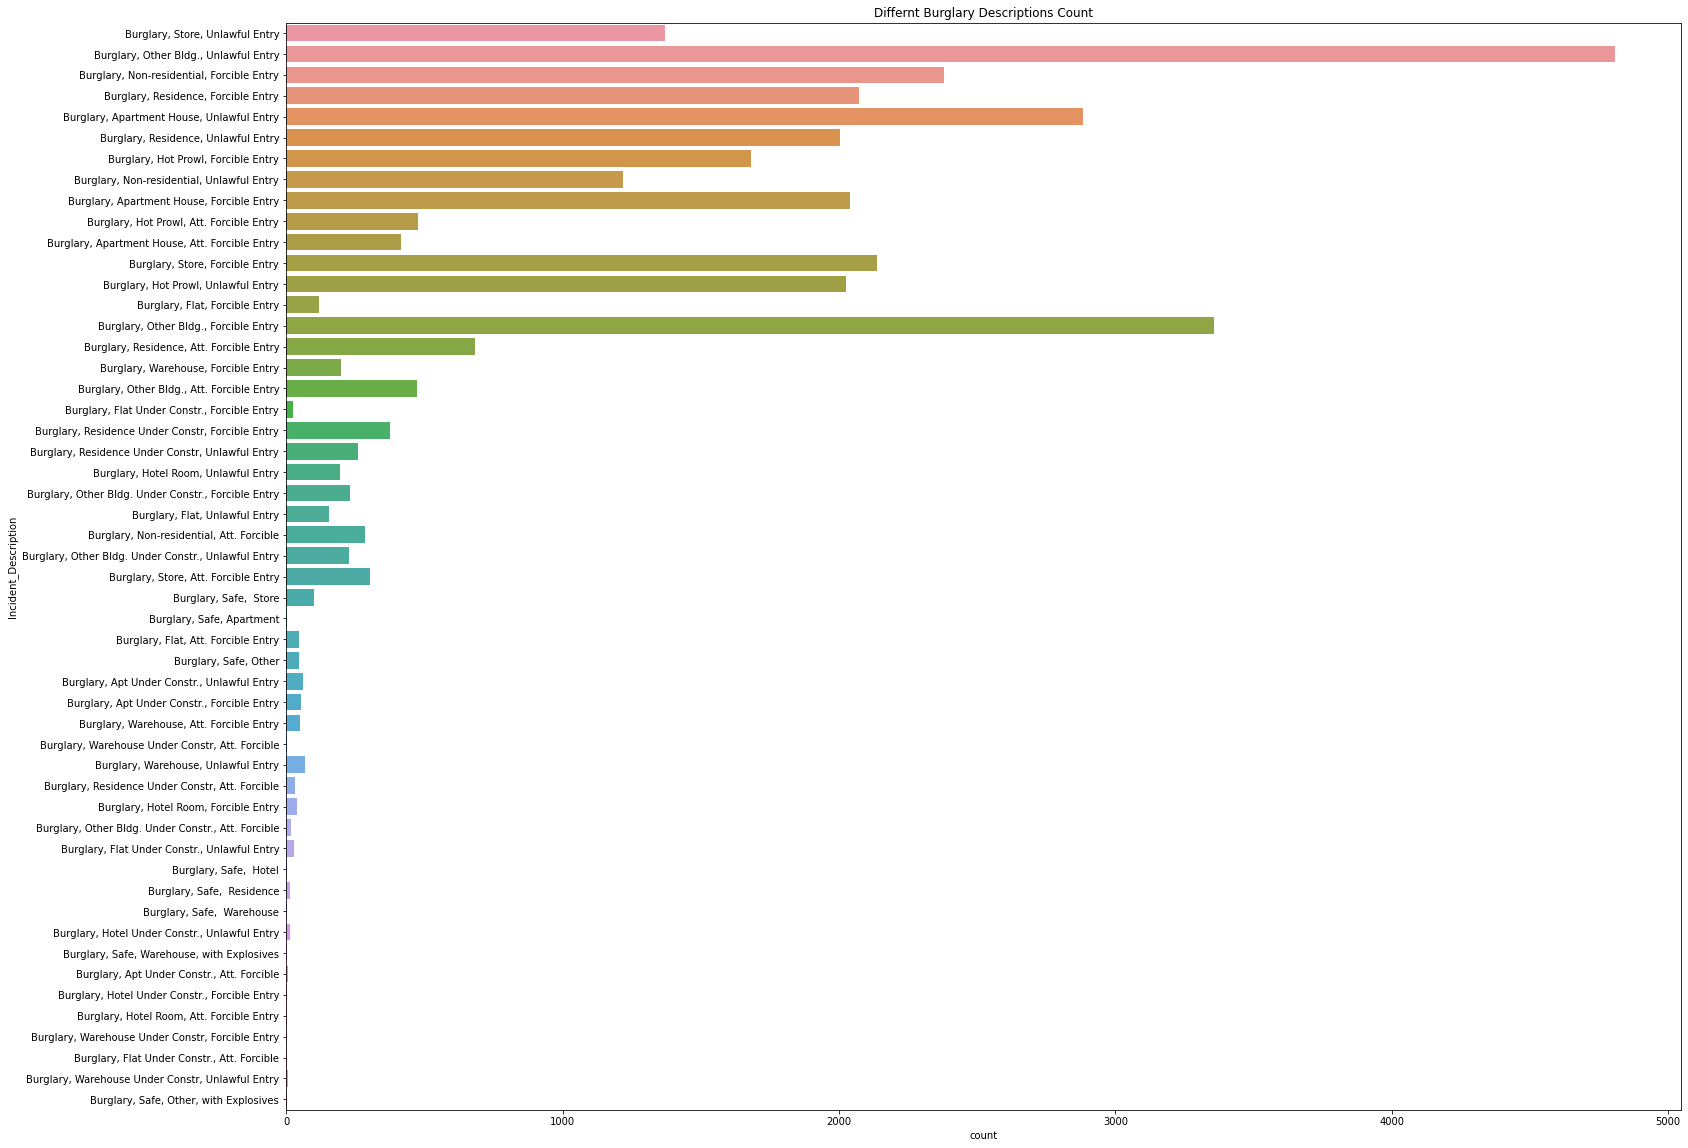

In [ ]:
fig, count = plt.subplots(figsize = (25,20))
count = sns.countplot(y = Burglary['Incident_Description'])
count.set_title('Differnt Burglary Descriptions Count')

# **POLICE DISTRICTS**

In [ ]:
df2 = reduced_categories

NameError: ignored

In [ ]:
fig, count = plt.subplots(figsize = (12,10))
count = sns.countplot(x = df2['Police_District'])
count.set_title('Different Police District vs Count')

In [ ]:
district_category = pd.crosstab(df2['Incident_Category'], df2['Police_District'])
district_category

Police_District,Bayview,Central,Ingleside,Mission,Northern,Out of SF,Park,Richmond,Southern,Taraval,Tenderloin
Incident_Category,,,,,,,,,,,
Assault,4078,3970,2802,5825,3886,135,1112,1190,4656,1901,5572
Burglary,2524,4835,2924,3812,5761,40,2222,2327,4522,2569,1457
Fraud,1246,2504,1678,1813,2271,805,727,1282,1947,2249,985
Larceny Theft,9930,34036,9493,17625,30987,489,7860,12954,18155,11479,8523
Lost Property,740,2790,678,1962,1790,530,444,715,1927,1063,1448
Malicious Mischief,3813,6093,3275,4892,5430,65,1931,2277,4953,2848,2321
Motor Vehicle Theft,4686,2309,3874,3781,3247,273,1501,1873,2913,2756,1265
Non-Criminal,2504,4856,2976,4296,3927,187,1821,2139,4731,2867,4589
Other Miscellaneous,3707,6017,3184,7327,4827,226,1482,1885,5717,2179,5299


Text(0.5, 1.0, 'Different Categories and    Districts')

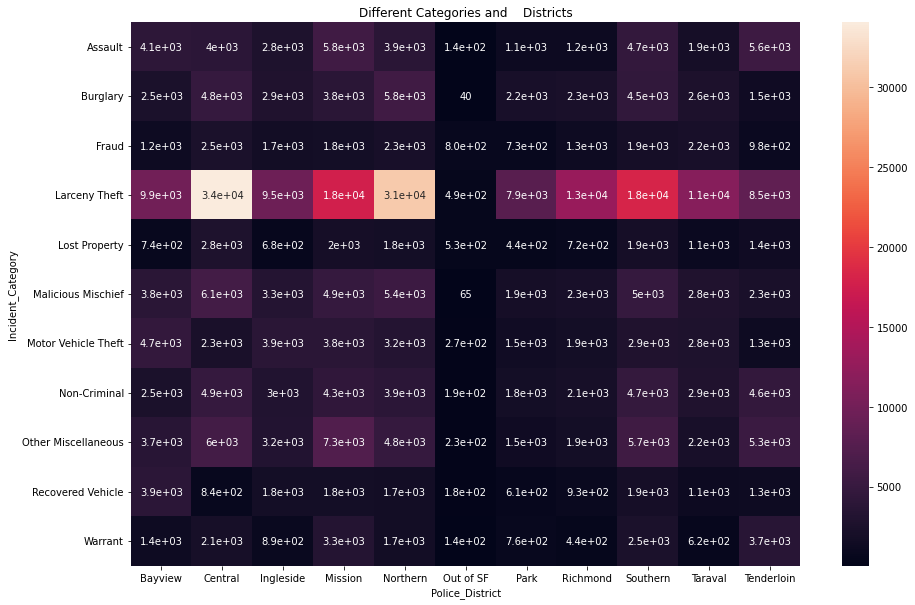

In [ ]:
fig, heatmap = plt.subplots(figsize = (15,10))
heatmap = sns.heatmap(district_category, annot=True)
heatmap.set_title('Different Categories and    Districts')

Text(0.5, 1.0, 'Categories Count vs  District')

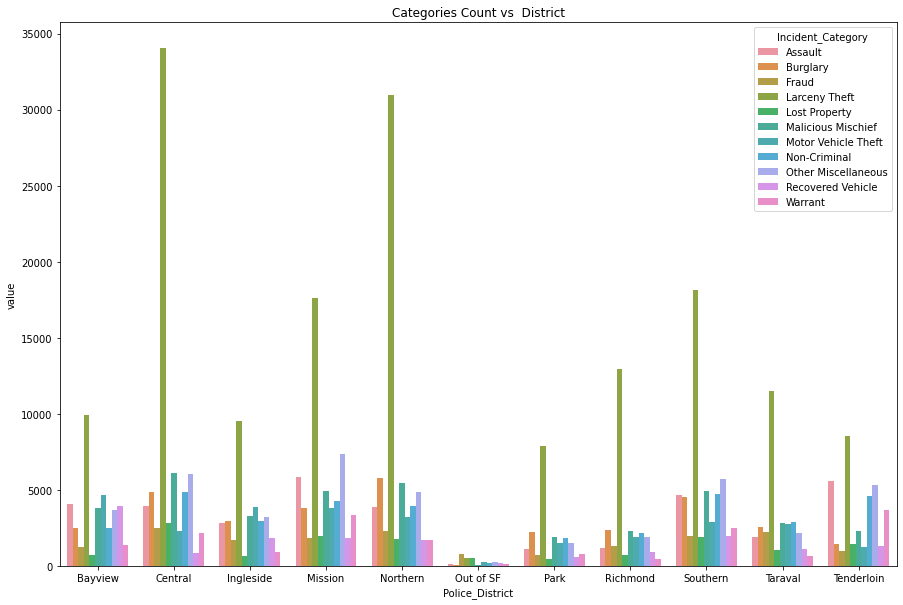

In [ ]:
df3 = district_category.stack().reset_index().rename(columns={0:'value'})
fig, bar = plt.subplots(figsize = (15,10))
bar = sns.barplot(x=df3['Police_District'], y=df3['value'], hue=df3['Incident_Category'])
bar.set_title('Categories Count vs  District')

In [ ]:
df5 = pd.DataFrame(df2.groupby('Incident_Year')['Incident_Category'].count())
#df5['Incident_Year'] = df5['Incident_Year'].astype(int)
df5.reset_index(inplace=True)
df5

,Incident_Year,Incident_Category
0,2018,113398
1,2019,109954
2,2020,88457
3,2021,97262
4,2022,29041


# **Crime Counts from the 2018 - 2022**

[Text(0, 0, '0'),
 Text(0, 0, '2018'),
 Text(0, 0, '2018.5'),
 Text(0, 0, '2019'),
 Text(0, 0, '2019.5'),
 Text(0, 0, '2020'),
 Text(0, 0, '2020.5'),
 Text(0, 0, '2021'),
 Text(0, 0, '2021.5'),
 Text(0, 0, '2022')]

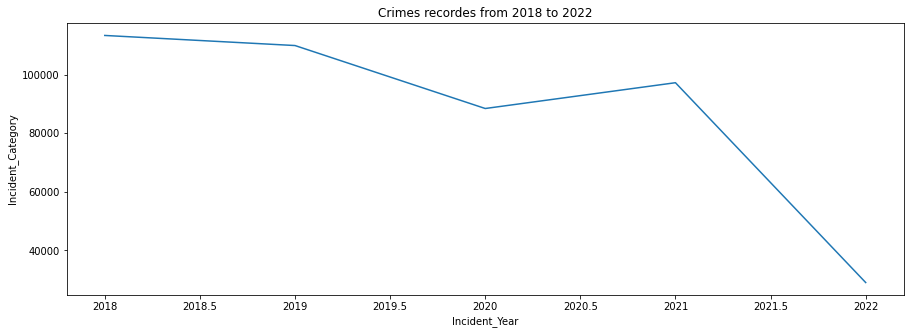

In [ ]:
fig, line = plt.subplots(figsize = (15,5))
line = sns.lineplot(x = df5['Incident_Year'], y=df5['Incident_Category'])
line.set_title('Crimes recordes from 2018 to 2022')
line.set_xticklabels([0,2018, 2018.5,2019, 2019.5,2020, 2020.5,2021, 2021.5,2022])

In [ ]:
year_category = pd.crosstab(df2['Incident_Year'], df2['Incident_Category'])
year_category

Incident_Category,Assault,Burglary,Fraud,Larceny Theft,Lost Property,Malicious Mischief,Motor Vehicle Theft,Non-Criminal,Other Miscellaneous,Recovered Vehicle,Warrant
Incident_Year,,,,,,,,,,,
2018,9041,7041,4727,44186,4693,8459,5240,9536,11712,3237,5526
2019,8855,5949,4640,44163,4338,8617,5311,8995,10599,3113,5374
2020,6982,9124,3653,28178,2094,8447,7464,6762,8434,4112,3207
2021,7752,8674,3390,34569,2192,9628,7878,7504,8714,4299,2662
2022,2497,2205,1097,10435,770,2747,2585,2096,2391,1385,833


# **Most Occuring Crimes over the Years**

Text(0.5, 1.0, 'Different crimes from 2018 - 2022')

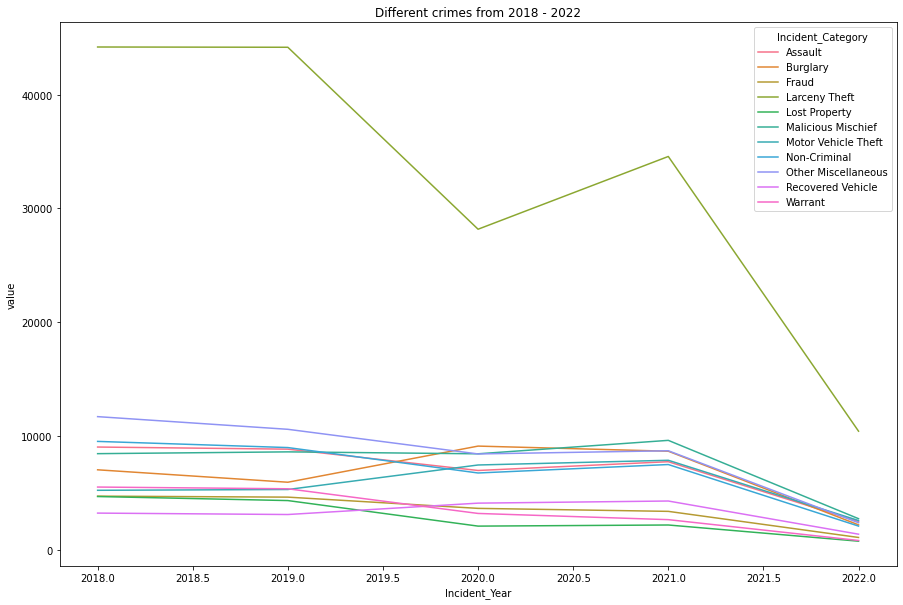

In [ ]:
stack = year_category.stack().reset_index().rename(columns={0:'value'})
fit = stack['Incident_Year'] != 2022
stacked = stack[fit]
fig, count = plt.subplots(figsize = (15,10))
line = sns.lineplot(x=stack['Incident_Year'], y=stack['value'], hue=stack['Incident_Category'])
line.set_title('Different crimes from 2018 - 2022')

# Total Crime Count on different days

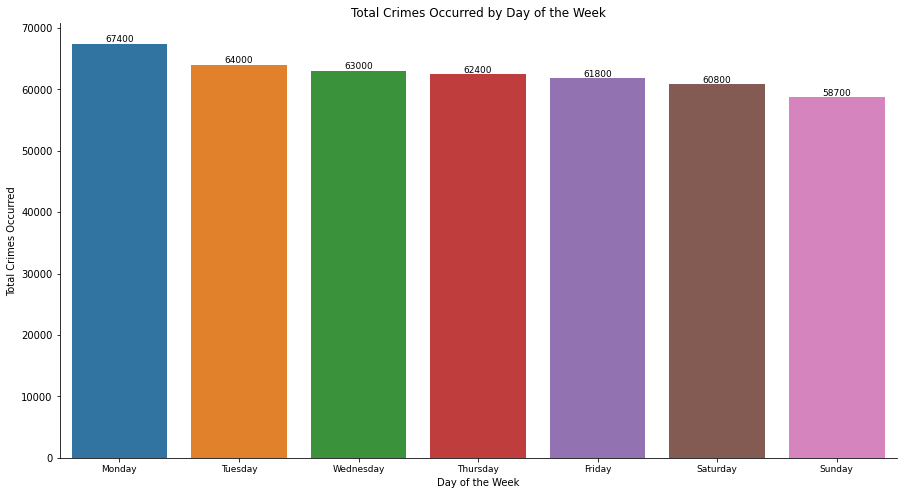

In [ ]:
fig, ax = plt.subplots()

sns.barplot(x = df2["Incident_Day_of_Week"].value_counts().index, y = df2["Incident_Day_of_Week"].value_counts())

ax.set_title("Total Crimes Occurred by Day of the Week")
ax.set_xticklabels(["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"], fontsize=9)
ax.set_xlabel("Day of the Week")
ax.set_ylabel("Total Crimes Occurred")

for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % round(int(p.get_height()), -2), 
            fontsize=9, color='black', ha='center', va='bottom')
sns.despine()

# **Occurance of different types of crimes in San Francisco in 2018**

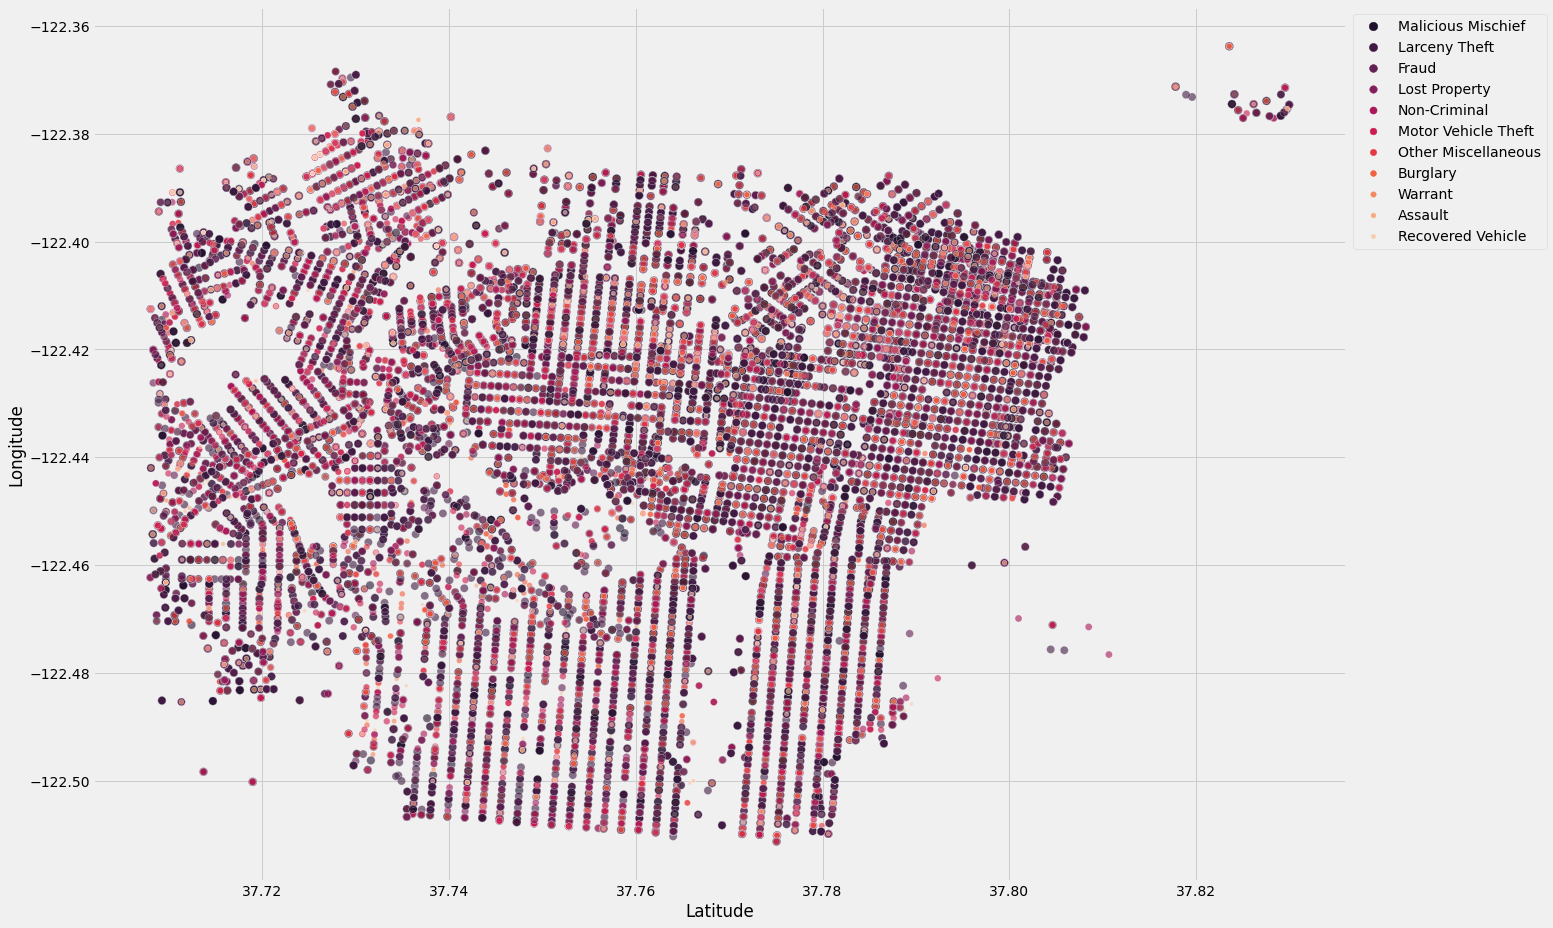

In [ ]:
with plt.style.context('fivethirtyeight'):
    fig, ax = plt.subplots(1, 1, figsize=(20, 15))
  
    sns.scatterplot(data=df2[df2['Incident_Year']==2018], x='Latitude', y='Longitude', alpha=0.6, palette='rocket', hue='Incident_Category', size='Incident_Category') 

    plt.legend(bbox_to_anchor=(1.0, 1.0), loc='upper left')

# **Occurance of different types of crimes in San Francisco in 2022**

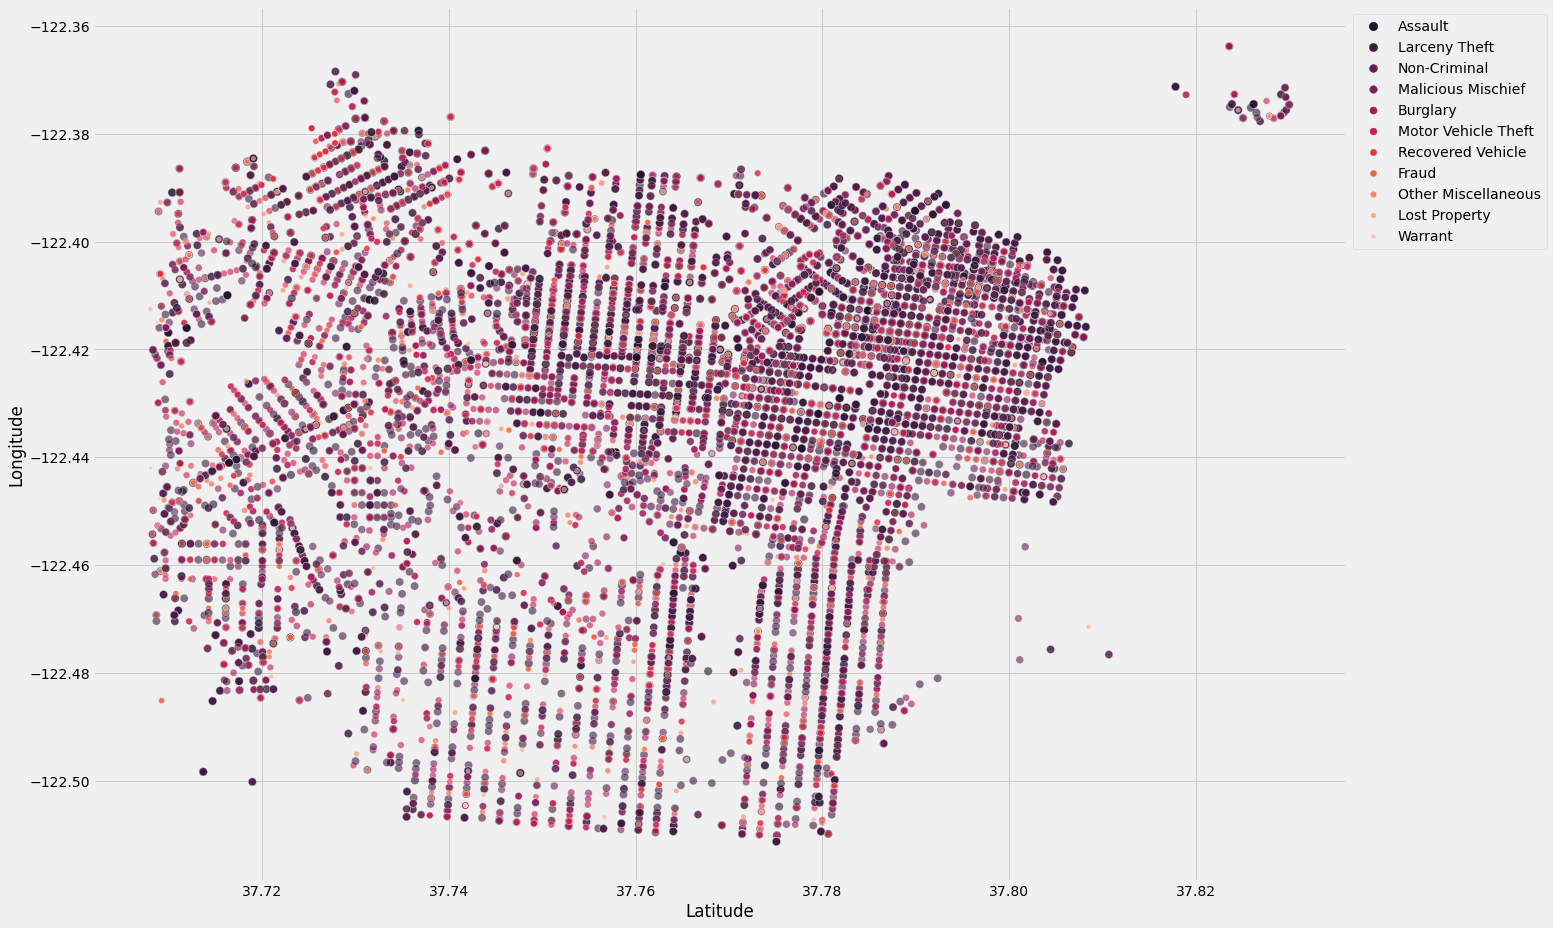

In [ ]:
with plt.style.context('fivethirtyeight'):
    fig, ax = plt.subplots(1, 1, figsize=(20, 15))
  
    sns.scatterplot(data=df2[df2['Incident_Year']==2022], x='Latitude', y='Longitude', alpha=0.6, palette='rocket', hue='Incident_Category', size='Incident_Category') 

    plt.legend(bbox_to_anchor=(1.0, 1.0), loc='upper left')